In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [2]:
ge = pdr.get_data_yahoo('GE', datetime(2000, 1, 1), datetime(2018, 1, 1))
ge.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,51.000000,51.229168,49.729168,50.000000,27.884933,22069800
2000-01-04,49.083332,49.333332,48.000000,48.000000,26.769543,22121400
2000-01-05,47.916668,49.000000,47.520832,47.916668,26.723057,27292800
2000-01-06,47.708332,48.979168,47.541668,48.557266,27.080324,19873200
2000-01-07,49.333332,50.625000,49.000000,50.437500,28.128927,20141400


In [3]:
aapl = pdr.get_data_yahoo('AAPL', datetime(2000, 1, 1), datetime(2018, 1, 1))
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,3.745536,4.017857,3.631696,3.997768,2.706315,133949200
2000-01-04,3.866071,3.950893,3.613839,3.660714,2.478145,128094400
2000-01-05,3.705357,3.948661,3.678571,3.714286,2.514411,194580400
2000-01-06,3.790179,3.821429,3.392857,3.392857,2.296817,191993200
2000-01-07,3.446429,3.607143,3.410714,3.553571,2.405613,115183600


In [5]:
fb = pdr.get_data_yahoo('FB', datetime(2012, 6, 6), datetime(2018, 1, 1))
fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-06-06,26.070000,27.17,25.520000,26.809999,26.809999,61489200
2012-06-07,27.000000,27.35,26.150000,26.309999,26.309999,26159500
2012-06-08,26.549999,27.76,26.440001,27.100000,27.100000,38034000
2012-06-11,27.180000,28.07,26.840000,27.010000,27.010000,28219600
2012-06-12,27.480000,27.77,26.959999,27.400000,27.400000,15816800


In [6]:
gs = pdr.get_data_yahoo('GS', datetime(2000, 1, 1), datetime(2018, 1, 1))
gs.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,94.1875,94.3750,87.750,88.3125,73.011696,1822600
2000-01-04,87.0000,87.5000,82.250,82.7500,68.412941,1647700
2000-01-05,80.8750,81.8750,78.375,78.8750,65.209305,1516600
2000-01-06,78.6250,84.5000,78.625,82.2500,67.999550,1845100
2000-01-07,83.0625,83.1875,79.875,82.5625,68.257935,1127400


In [7]:
btc = pdr.get_data_yahoo('BTC-USD', datetime(2000, 1, 1), datetime(2018, 1, 1))
btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-16,0.04951,0.04951,0.04951,0.04951,0.04951,0
2010-07-17,0.04951,0.08585,0.05941,0.08584,0.08584,5
2010-07-18,0.08584,0.09307,0.07723,0.08080,0.08080,49
2010-07-19,0.08080,0.08181,0.07426,0.07474,0.07474,20
2010-07-20,0.07474,0.07921,0.06634,0.07921,0.07921,42


In [8]:
#Drop all columns except Adj Close as we are predicting n adjusted close price for the next data using past data
ge.drop(['Open','High','Low','Close','Volume'], axis =1, inplace = True)
aapl.drop(['Open','High','Low','Close','Volume'], axis =1, inplace = True)
fb.drop(['Open','High','Low','Close','Volume'], axis =1, inplace = True)
gs.drop(['Open','High','Low','Close','Volume'], axis =1, inplace = True)
btc.drop(['Open','High','Low','Close','Volume'], axis =1, inplace = True)
fb.head()

,Adj Close
Date,
2012-06-06,26.809999
2012-06-07,26.309999
2012-06-08,27.100000
2012-06-11,27.010000
2012-06-12,27.400000


In [15]:
import matplotlib.pyplot as plt

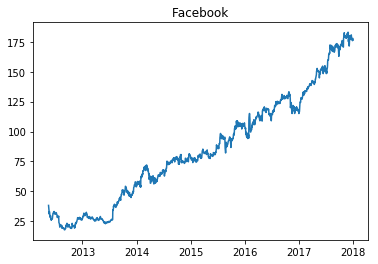

In [18]:
plt.plot(fb)
plt.title("Facebook")
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller

C:\Users\GreenaSimon\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [20]:
print("Augmented Dickey-Fuller Test for Non-stationarity")
result = adfuller(fb['Adj Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Augmented Dickey-Fuller Test for Non-stationarity
ADF Statistic: 0.692556
p-value: 0.989688
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [21]:
import numpy as np

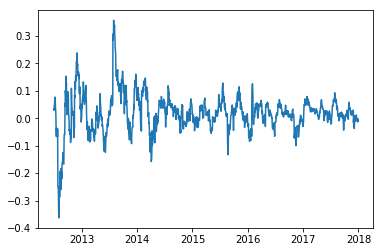

In [22]:
fb_log = np.log(fb)
moving_avg = fb_log.rolling(window=30,center=False).mean()
fb_log_moving_avg_diff = fb_log - moving_avg
#fb_log_moving_avg_diff.head(30)
fb_log_moving_avg_diff.dropna(inplace=True)
plt.plot(fb_log_moving_avg_diff)
#plt.plot(moving_avg, color='red')
plt.show()

In [23]:
print("Augmented Dickey-Fuller Test for Non-stationarity")
result = adfuller(fb_log_moving_avg_diff['Adj Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Augmented Dickey-Fuller Test for Non-stationarity
ADF Statistic: -6.117112
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [24]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

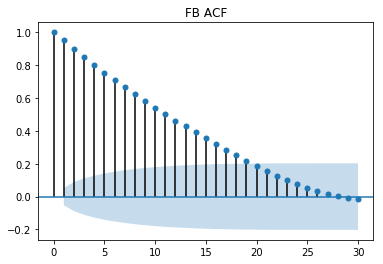

In [25]:
plot_acf(fb_log_moving_avg_diff,lags = 30)
plt.title('FB ACF')
plt.show()

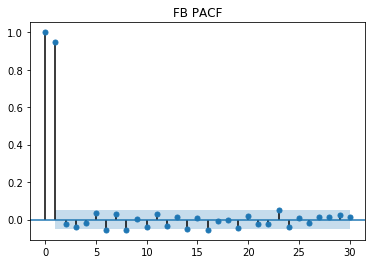

In [26]:
plot_pacf(fb_log_moving_avg_diff, lags = 30)
plt.title('FB PACF')
plt.show()

In [13]:
#Using 90% of the data for training and 10% for testing
fb_train_size = int(len(fb) * 0.9)
fb_test_size = len(fb) - fb_train_size
fb_train, fb_test = fb.iloc[0:fb_train_size,:], fb.iloc[fb_train_size:len(fb.values),:]

In [11]:
from statsmodels.tsa.arima_model import ARIMA

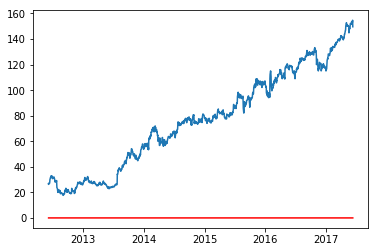

In [16]:
modelfb = ARIMA(fb_train['Adj Close'], order=(0, 1, 0))  
results_fb = modelfb.fit(disp=0, trend = 'c')  
plt.plot(fb_train)
plt.plot(results_fb.fittedvalues, color='red')
plt.show()